In [1]:
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_full_image_with_features,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_width,
    reconstruct_image_from_general,
    plot_full,
)

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
plates = [
    "078_20220920",
    "079_20220920",
    "080_20220920",
    "081_20220920",
    "082_20220920",
    "083_20220920",
    "084_20220920",
    "001_20220920",
    "024_20220920",
    "073_20220920",
    "002_20220920",
    "003_20220920",
    "004_20220920",
    "005_20220920",
    "006_20220920",
    "007_20220920",
    "008_20220920",
    "009_20220920",
    "010_20220920",
    "011_20220920",
    "012_20220920",
    "019_20220920",
    "020_20220920",
    "021_20220920",
    "022_20220920",
    "023_20220920",
    "037_20220920",
    "038_20220920",
    "039_20220920",
    "040_20220920",
    "042_20220920",
    "043_20220920",
    "044_20220920",
    "045_20220920",
    "046_20220920",
    "016_20220921",
    "017_20220921",
    "034_20220921",
    "051_20220920",
    "094_20220921",
    "064_20220921",
    "026_20220921",
    "027_20220921",
    "028_20220921",
    "029_20220921",
    "031_20220921",
    "033_20220921",
    "035_20220921",
    "036_20220921",
    "047_20220920",
    "041_20220920",
    "015_20220921",
    "068_20220921",
    "107_20220921",
    "095_20220921",
    "062_20220921",
    "096_20220921",
    "104_20220921",
    "050_20220920",
    "030_20220921",
    "025_20220921",
    "100_20220921",
    "067_20220921",
    "048_20220920",
    "055_20220921",
    "056_20220921",
    "057_20220921",
    "058_20220921",
    "059_20220921",
    "060_20220921",
    "061_20220921",
    "063_20220921",
    "014_20220921",
    "018_20220921",
    "099_20220921",
    "069_20220921",
    "054_20220920",
    "075_20220920",
    "092_20220921",
    "093_20220921",
    "097_20220921",
    "098_20220921",
    "105_20220921",
    "106_20220921",
    "108_20220921",
    "085_20220921",
    "086_20220921",
    "087_20220921",
    "088_20220921",
    "089_20220921",
    "090_20220921",
    "091_20220921",
    "049_20220920",
    "052_20220920",
    "053_20220920",
    "074_20220920",
    "076_20220920",
    "077_20220920",
    "013_20220921",
    "070_20220921",
    "071_20220921",
    "072_20220921",
    "102_20220921",
    "032_20220921",
    "101_20220921",
    "065_20220921",
    "066_20220921",
    "103_20220921",
]
plates = [
    "_".join((str(int(plate.split("_")[0])), str(int(plate.split("_")[1]))))
    for plate in plates
]
directory_targ = directory_project

In [3]:
update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/771 [00:00<?, ?it/s]

In [4]:
plates = ["19_20220920"]

In [5]:
folders = all_folders.loc[all_folders["unique_id"].isin(plates)]

In [6]:
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
)

In [7]:
folders = folders.sort_values(by="datetime")

In [8]:
folders

,total_path,Plate,strain,medium,CrossDate,/Img/TileConfiguration.txt.registered,/Analysis/skeleton_compressed.mat,/Analysis/skeleton_masked_compressed.mat,/Analysis/skeleton_pruned_compressed.mat,/Analysis/transform.mat,...,/Analysis/nx_graph_pruned_labeled.p,date,folder,PrincePos,root,split,Pbait,Temperature,unique_id,datetime
445,/projects/0/einf914/data/20220920_1438_Plate01,019,'A5-C2','control',20220920,True,True,True,True,False,...,False,"20.09.2022, 14:38:",20220920_1438_Plate01,NaN,NaN,NaN,NaN,NaN,19_20220920,2022-09-20 14:38:00
188,/projects/0/einf914/data/20220921_1716_Plate01,019,'A5-C2','control',20220920,True,True,True,True,False,...,False,"21.09.2022, 17:16:",20220921_1716_Plate01,NaN,NaN,NaN,NaN,NaN,19_20220920,2022-09-21 17:16:00
160,/projects/0/einf914/data/20220923_1447_Plate01,019,'A5-C2','control',20220920,True,True,True,True,True,...,True,"23.09.2022, 14:47:",20220923_1447_Plate01,NaN,NaN,NaN,NaN,NaN,19_20220920,2022-09-23 14:47:00
564,/projects/0/einf914/data/20220926_1126_Plate01,019,'A5-C2','control',20220920,True,True,True,True,False,...,True,"26.09.2022, 11:26:",20220926_1126_Plate01,NaN,NaN,NaN,NaN,NaN,19_20220920,2022-09-26 11:26:00
372,/projects/0/einf914/data/20220930_1925_Plate01,019,'A5-C2','control',20220920,True,True,True,True,True,...,True,"30.09.2022, 19:25:",20220930_1925_Plate01,NaN,NaN,NaN,NaN,NaN,19_20220920,2022-09-30 19:25:00
732,/projects/0/einf914/data/20221003_1829_Plate01,019,'A5-C2','control',20220920,True,True,True,True,True,...,True,"03.10.2022, 18:29:",20221003_1829_Plate01,NaN,NaN,NaN,NaN,NaN,19_20220920,2022-10-03 18:29:00


In [9]:
exp = Experiment(directory_targ)
exp.load(folders[3:])
exp.dates.sort()

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2022-09-26 11:26:00
2022-09-30 19:25:00
2022-10-03 18:29:00


In [10]:
for t in range(exp.ts):
    exp.load_tile_information(t)

In [11]:
for t in range(exp.ts):
    exp.load_tile_information(t)

load_graphs(exp, directory_targ, post_process=False)

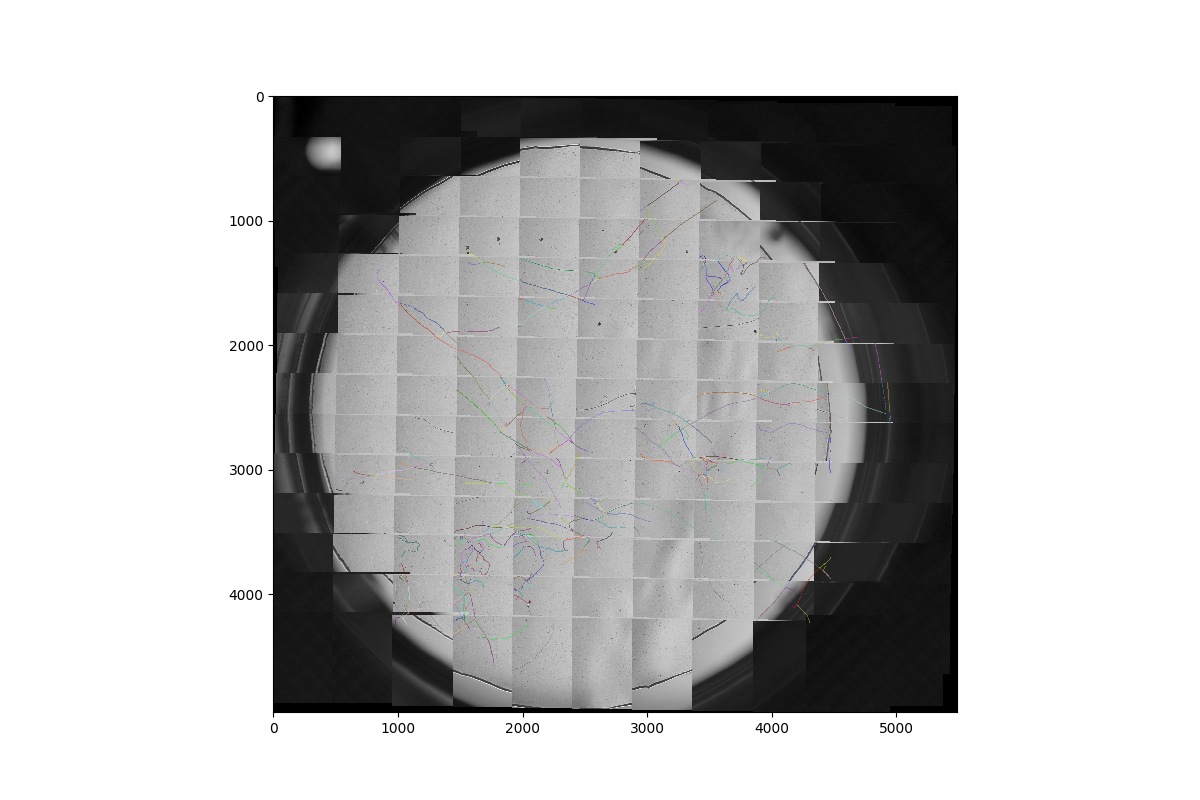

In [12]:
%matplotlib widget
t = 2
plot_full_image_with_features(exp, t, edges=get_all_edges(exp, t), dilation=5)

In [ ]:
plot_full_image_with_features(
    exp,
    t,
    edges=get_all_edges(exp, t),
    dilation=5,
    region=[[10000, 10000], [15000, 15000]],
)

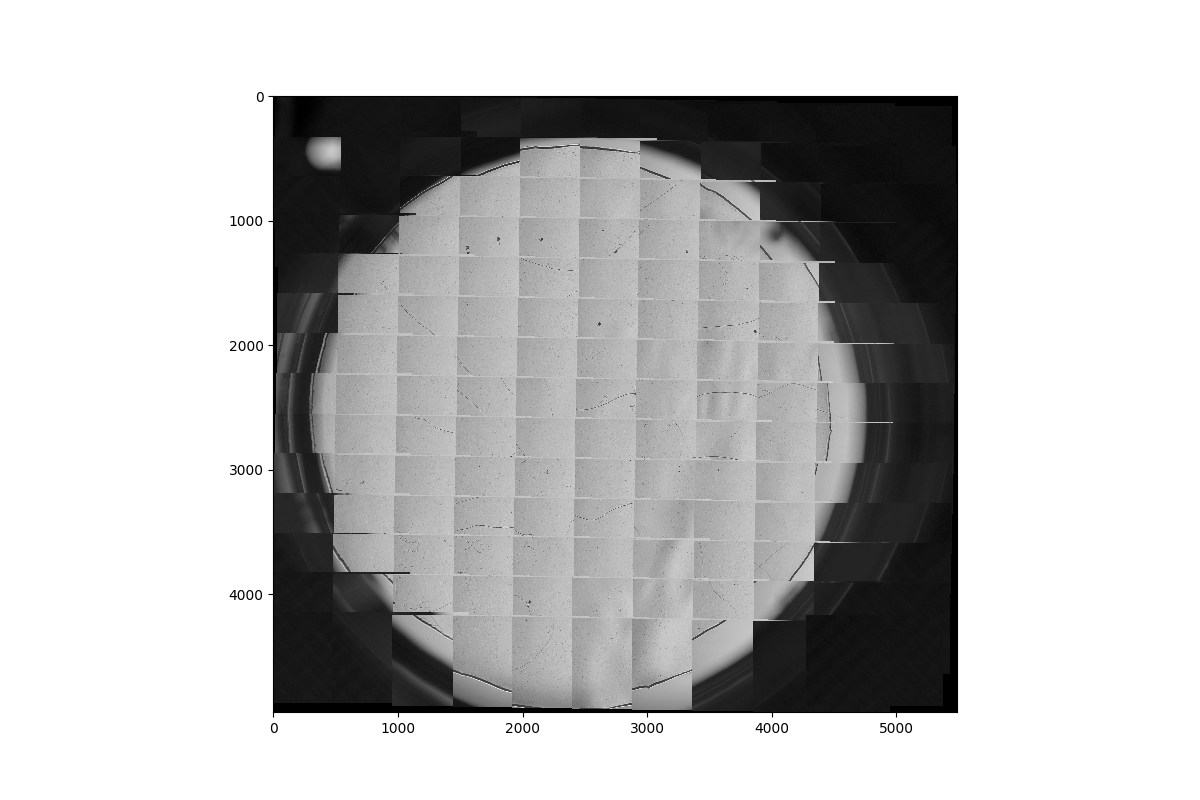

In [13]:
plot_full_image_with_features(exp, t)

In [ ]:
plt.close("all")
start = 0
finish = start + 2
for i in range(start, finish):
    plot_t_tp1([], [], None, None, skels[i], skels[i])

In [32]:
%matplotlib widget

import os
import sys

sys.path.insert(0, os.getenv("HOME") + "/pycode/MscThesis/")
# sys.path.insert(0,r'C:\Users\coren\Documents\PhD\Code\AMFtrack')

import pandas as pd
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    get_folders_by_plate_id,
)


import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    sparse_to_doc,
)
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)

In [70]:
select = folders
folder_list = list(select["folder"])
folder_list.sort()
skels = []
ims = []
masks = []
kernel = np.ones((5, 5), np.uint8)
itera = 1
start = 2
finish = start + 2
kernel = np.ones((5, 5), np.uint8)
for folder in folder_list[start:finish]:
    path_snap = directory + folder
    skel_info = read_mat(path_snap + "/Analysis/skeleton_pruned_compressed.mat")
    skel = skel_info["skeleton"]
    skels.append(cv2.dilate(skel.astype(np.uint8), kernel, iterations=itera))
    im = read_mat(path_snap + "/Analysis/raw_image.mat")["raw"]
    ims.append(im)

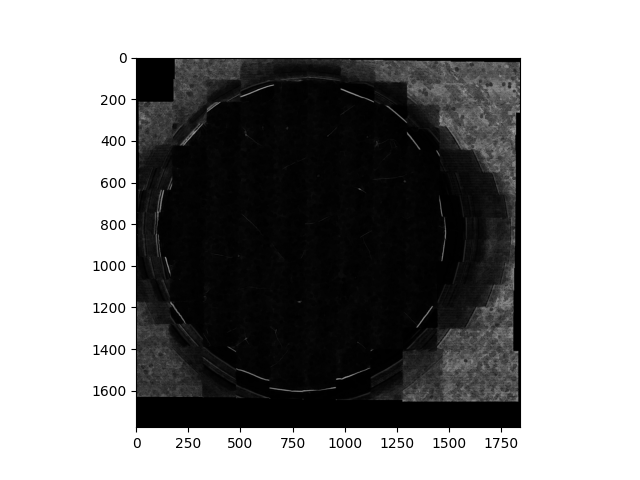

In [74]:
fig, ax = plt.subplots()
ax.imshow(ims[1], cmap="gray")

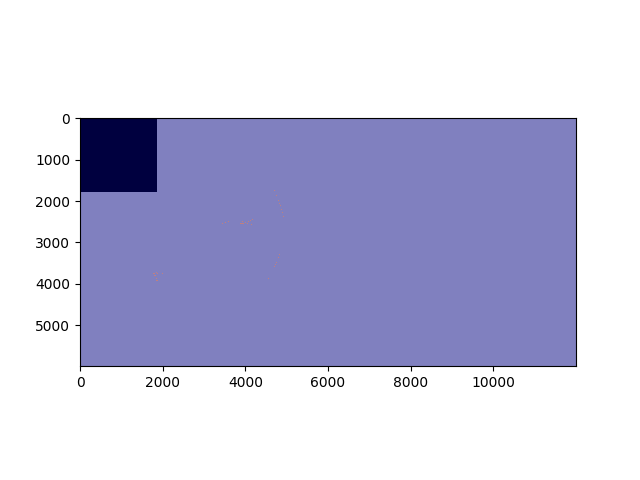

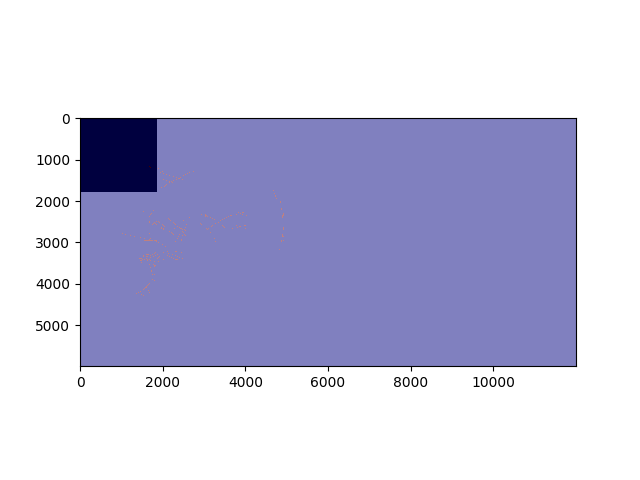

In [75]:
plt.close("all")
kernel = np.ones((5, 5), np.uint8)
for i in range(len(skels)):
    plot_t_tp1([], [], None, None, skels[i], 0 * ims[i])

In [142]:
folder_list = list(folders["folder"])
folder_list.sort()

dilateds = []
skel_docs = []
directory_name = folder_list[0]
path_snap = directory + directory_name
skel_info = read_mat(path_snap + "/Analysis/skeleton_pruned.mat")
skel = skel_info["skeleton"]
skel_doc = sparse_to_doc(skel)
skel_docs.append(skel_doc)
Rs = [np.array([[1, 0], [0, 1]])]
ts = [np.array([0, 0])]
for i, directory_name in enumerate(folder_list[1:]):
    path_snap = directory + directory_name
    skel_info = read_mat(path_snap + "/Analysis/skeleton_pruned_realigned.mat")
    skel = skel_info["skeleton"]
    skel_doc = sparse_to_doc(skel)
    skel_docs.append(skel_doc)
    try:
        transform = sio.loadmat(path_snap + "/Analysis/transform.mat")
    except:
        transform = sio.loadmat(path_snap + "/Analysis/transform_corrupt.mat")
    R, t = transform["R"], transform["t"]
    Rs.append(R)
    ts.append(t)

In [143]:
skel

<30000x60000 sparse matrix of type '<class 'numpy.uint8'>'
	with 307355 stored elements in Compressed Sparse Column format>

In [88]:
skel_sparse = skel
dim = skel_sparse.shape

compressed = cv2.resize(
    cv2.dilate(skel_sparse.todense(), kernel, iterations=itera),
    (dim[1] // 5, dim[0] // 5),
)

In [95]:
from amftrack.pipeline.functions.image_processing.realign import (
    transform_skeleton_final,
)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [96]:
R0 = np.array([[1, 0], [0, 1]])
t0 = np.array([0, 0])
j = 3
for i, skel in enumerate(skel_docs):
    R0 = np.dot(np.transpose(Rs[i]), R0)
    t0 = -np.dot(ts[i], np.transpose(Rs[i])) + np.dot(t0, np.transpose(Rs[i]))
    directory_name = folder_list[i]
    path_snap = directory + directory_name
    if i == j:
        print(f"saving {i} {path_snap}")
        skel_aligned = transform_skeleton_final(skel, R0, t0).astype(np.uint8)
        skel_sparse_2 = scipy.sparse.csc_matrix(skel_aligned)
        dim = skel_sparse.shape
        kernel = np.ones((5, 5), np.uint8)
        itera = 1
        compressed = cv2.resize(
            cv2.dilate(skel_sparse.todense(), kernel, iterations=itera),
            (dim[1] // 5, dim[0] // 5),
        )

saving 3 /projects/0/einf914/data/20220926_1126_Plate01


In [101]:
Rot, trans = R0, t0
skeleton_doc = skel_doc
skeleton_transformed = {}
transformed_keys = np.round(
    np.transpose(np.dot(Rot, np.transpose(np.array(list(skeleton_doc.keys()))))) + trans
).astype(np.int)

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [102]:
faulty = []
for pixel in list(transformed_keys):
    if pixel[0] >= 0 and pixel[1] >= 0:
        skeleton_transformed[(pixel[0], pixel[1])] = 1
    else:
        faulty.append(pixel)

In [107]:
xs = [pos[0] for pos in list(transformed_keys)]
ys = [pos[1] for pos in list(transformed_keys)]

In [114]:
print(len(skeleton_transformed.keys()))
skeleton_transformed2 = dilate(skeleton_transformed)
print(len(skeleton_transformed2.keys()))
skeleton_transformed3 = zhangSuen(skeleton_transformed2)
print(len(skeleton_transformed3.keys()))

308415
1081664
307355


In [133]:
skeleton_transformed_sparse = sparse.lil_matrix((30000, 60000)).astype(np.uint8)
for pixel in list(skeleton_transformed.keys()):
    # if pixel[0]<30000 and pixel[1]<60000:
    skeleton_transformed_sparse[(pixel[0], pixel[1])] = 1

In [134]:
skel_sparse = scipy.sparse.csc_matrix(skeleton_transformed_sparse, shape=(30000, 60000))

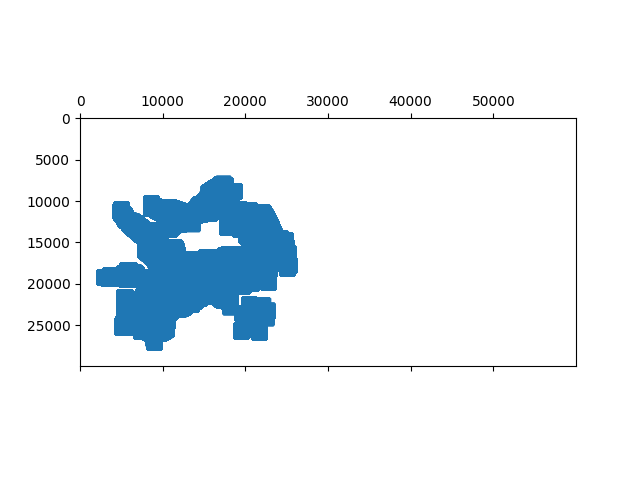

In [135]:
fig, ax = plt.subplots()
ax.spy(skeleton_transformed_sparse)

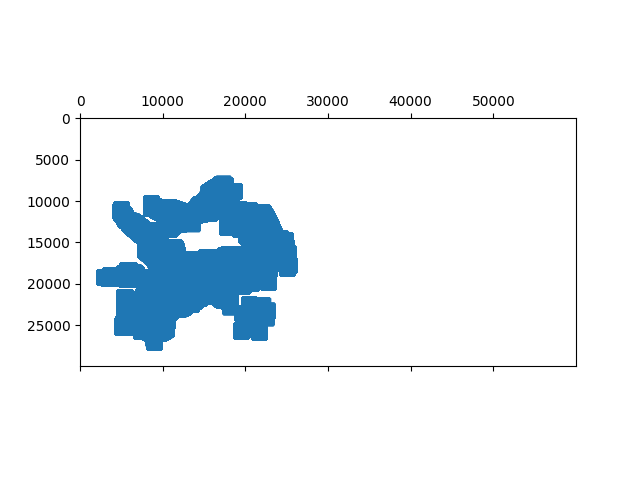

In [136]:
fig, ax = plt.subplots()
ax.spy(skel_sparse)

In [137]:
print(np.sum(skel_sparse))
print(np.sum(skeleton_transformed_sparse))

308415
308415


In [98]:
skeleton_transformed = {}
transformed_keys = np.round(
    np.transpose(np.dot(Rot, np.transpose(np.array(list(skeleton_doc.keys()))))) + trans
).astype(np.int)
for pixel in list(transformed_keys):
    if pixel[0] >= 0 and pixel[1] >= 0:
        skeleton_transformed[(pixel[0], pixel[1])] = 1
    else:
        # print("some negative pixels")
        pass
skeleton_transformed = dilate(skeleton_transformed)
skeleton_transformed = zhangSuen(skeleton_transformed)
skeleton_transformed_sparse = sparse.lil_matrix((30000, 60000)).astype(np.uint8)
for pixel in list(skeleton_transformed.keys()):
    # if pixel[0]<30000 and pixel[1]<60000:
    skeleton_transformed_sparse[(pixel[0], pixel[1])] = 1

(array([[ 0.99912832,  0.0417445 ],
        [-0.0417445 ,  0.99912832]]),
 array([[3798.09994568, 1033.43393825]]))

In [92]:
np.sum(skel_sparse)

308626

In [97]:
np.sum(skel_sparse_2)

120357

In [90]:
skel = read_mat(path_snap + "/Analysis/skeleton_masked.mat")["skeleton"]
skeleton = scipy.sparse.dok_matrix(skel)

In [91]:
skeleton.shape

(26553, 27424)

In [164]:
# select = all_folders.loc[(all_folders['folder'].isin([ '20210929_0308_Plate21',
#  '20210929_0912_Plate21']))]
select = folders
folder_list = list(select["folder"])
folder_list.sort()
skels = []
ims = []
kernel = np.ones((5, 5), np.uint8)
itera = 5
start = 2

# start = choice(range(len(folder_list)))
finish = start + 2
for folder in folder_list[start:finish]:
    path_snap = directory + folder
    skel_info = read_mat(path_snap + "/Analysis/skeleton_pruned_compressed.mat")
    skel = skel_info["skeleton"]
    skels.append(cv2.dilate(skel.astype(np.uint8), kernel, iterations=itera))
    im = read_mat(path_snap + "/Analysis/raw_image.mat")["raw"]
    #     im = imageio.imread(path_snap+'/StitchedImage.tif')
    #     im = cv2.resize(im,(skel.shape[1],skel.shape[0]))
    #     M = np.float32([
    # 	[1, 0, 0],
    # 	[0, 1, -117]])
    #     im = cv2.warpAffine(im,M,(im.shape[1], im.shape[0]))
    ims.append(im)